In [1]:
import numpy as np
import pandas as pd
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import math
import torch
import spinup
import multiprocessing as mp

from torch.autograd import Variable
from sklearn.linear_model import LinearRegression
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from spinup.algos.pytorch.ddpg.core import MLPActorCritic

%matplotlib notebook

In [2]:
from src import *
from src.constants import DT, MAX_X, MAX_Y, BALL_ERROR_SCALING, BALL_D_ERROR_SCALING, BALL_INTEGRAL_ERROR_SCALING

In [3]:
train = True

In [4]:
with open('src/data/benchmark_trajectory.json') as json_file:
    benchmark_data = json.load(json_file)

In [5]:
t = np.array(benchmark_data['t'])
test_trajectory = np.array(benchmark_data['target'])
benchmark_trajectory = np.array(benchmark_data['trajectory'])
benchmark_angle = np.array(benchmark_data['angle'])
benchmark_u = np.array(benchmark_data['u'])

# Exploration

In [6]:
epoch = 250

In [7]:
root = 'src/data/black_box_controller/explo'

In [8]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_e_reward
w = 0.3
hidden_size = [50]
gamma = 0.99
act = torch.nn.ReLU
name='le0.3_[100]_relu_0.99'

Logging data to src/data/black_box_controller/explo/le0.3_[100]_relu_0.99/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            50
        ]
    },
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	500,
    "env_fn":	"create_env",
    "epochs":	250,
    "exp_name":	"test",
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7fb8fbbe4278>":	{
            "epoch_dict":	{},
            "exp_name":	"test",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"src/data/black_box_controller/explo/le0.3_[100]_relu_0.99",
            "output_file":	{
                "<_io.TextIOWrapper name='src/data/black_box_controller/explo/le0.3_[100]_relu_0.99/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
     

/home/benoit/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


---------------------------------------
|             Epoch |               1 |
|      AverageEpRet |            -126 |
|          StdEpRet |            51.9 |
|          MaxEpRet |           -78.3 |
|          MinEpRet |            -207 |
|  AverageTestEpRet |           -28.1 |
|      StdTestEpRet |            7.03 |
|      MaxTestEpRet |           -10.9 |
|      MinTestEpRet |           -38.1 |
|             EpLen |             264 |
|         TestEpLen |            58.5 |
| TotalEnvInteracts |         1.1e+03 |
|      AverageQVals |           -0.64 |
|          StdQVals |           0.755 |
|          MaxQVals |            20.8 |
|          MinQVals |             -19 |
|            LossPi |           0.571 |
|             LossQ |           0.613 |
|              Time |           0.945 |
---------------------------------------
---------------------------------------
|             Epoch |               2 |
|      AverageEpRet |           -64.8 |
|          StdEpRet |            32.7 |


---------------------------------------
|             Epoch |              11 |
|      AverageEpRet |           -69.3 |
|          StdEpRet |            21.9 |
|          MaxEpRet |           -43.2 |
|          MinEpRet |           -95.1 |
|  AverageTestEpRet |             -20 |
|      StdTestEpRet |             5.5 |
|      MaxTestEpRet |           -12.9 |
|      MinTestEpRet |           -29.2 |
|             EpLen |             167 |
|         TestEpLen |            49.6 |
| TotalEnvInteracts |        1.21e+04 |
|      AverageQVals |           -14.3 |
|          StdQVals |             5.4 |
|          MaxQVals |          0.0193 |
|          MinQVals |           -32.1 |
|            LossPi |            14.3 |
|             LossQ |            1.89 |
|              Time |            48.1 |
---------------------------------------
---------------------------------------
|             Epoch |              12 |
|      AverageEpRet |           -70.6 |
|          StdEpRet |            24.7 |


---------------------------------------
|             Epoch |              21 |
|      AverageEpRet |           -24.6 |
|          StdEpRet |             9.9 |
|          MaxEpRet |           -8.87 |
|          MinEpRet |             -43 |
|  AverageTestEpRet |             -22 |
|      StdTestEpRet |             8.9 |
|      MaxTestEpRet |           -2.78 |
|      MinTestEpRet |           -36.3 |
|             EpLen |            57.7 |
|         TestEpLen |            54.6 |
| TotalEnvInteracts |        2.31e+04 |
|      AverageQVals |           -16.3 |
|          StdQVals |            5.22 |
|          MaxQVals |            6.02 |
|          MinQVals |           -30.5 |
|            LossPi |            16.2 |
|             LossQ |            1.46 |
|              Time |            95.8 |
---------------------------------------
---------------------------------------
|             Epoch |              22 |
|      AverageEpRet |           -27.5 |
|          StdEpRet |            6.17 |


---------------------------------------
|             Epoch |              31 |
|      AverageEpRet |           -16.5 |
|          StdEpRet |            7.66 |
|          MaxEpRet |           -3.42 |
|          MinEpRet |           -34.6 |
|  AverageTestEpRet |             -18 |
|      StdTestEpRet |            8.47 |
|      MaxTestEpRet |            -3.4 |
|      MinTestEpRet |           -35.5 |
|             EpLen |            58.2 |
|         TestEpLen |            58.5 |
| TotalEnvInteracts |        3.41e+04 |
|      AverageQVals |           -9.43 |
|          StdQVals |             5.1 |
|          MaxQVals |            6.03 |
|          MinQVals |           -23.6 |
|            LossPi |            9.27 |
|             LossQ |           0.748 |
|              Time |             150 |
---------------------------------------
---------------------------------------
|             Epoch |              32 |
|      AverageEpRet |           -21.2 |
|          StdEpRet |            9.14 |


---------------------------------------
|             Epoch |              41 |
|      AverageEpRet |           -19.2 |
|          StdEpRet |             9.6 |
|          MaxEpRet |           -5.66 |
|          MinEpRet |           -47.6 |
|  AverageTestEpRet |           -22.2 |
|      StdTestEpRet |            12.5 |
|      MaxTestEpRet |            1.18 |
|      MinTestEpRet |           -47.3 |
|             EpLen |            65.1 |
|         TestEpLen |            76.2 |
| TotalEnvInteracts |        4.51e+04 |
|      AverageQVals |           -5.73 |
|          StdQVals |            3.69 |
|          MaxQVals |            5.75 |
|          MinQVals |           -27.6 |
|            LossPi |             5.6 |
|             LossQ |           0.735 |
|              Time |             223 |
---------------------------------------
---------------------------------------
|             Epoch |              42 |
|      AverageEpRet |           -21.1 |
|          StdEpRet |            7.08 |


---------------------------------------
|             Epoch |              51 |
|      AverageEpRet |           -17.9 |
|          StdEpRet |            15.5 |
|          MaxEpRet |            25.1 |
|          MinEpRet |           -30.1 |
|  AverageTestEpRet |           -23.9 |
|      StdTestEpRet |            9.01 |
|      MaxTestEpRet |           -2.37 |
|      MinTestEpRet |           -36.9 |
|             EpLen |             108 |
|         TestEpLen |            85.7 |
| TotalEnvInteracts |        5.61e+04 |
|      AverageQVals |           -5.35 |
|          StdQVals |            3.34 |
|          MaxQVals |            3.06 |
|          MinQVals |           -20.4 |
|            LossPi |            5.22 |
|             LossQ |           0.572 |
|              Time |             283 |
---------------------------------------
---------------------------------------
|             Epoch |              52 |
|      AverageEpRet |           -19.7 |
|          StdEpRet |            15.1 |


---------------------------------------
|             Epoch |              61 |
|      AverageEpRet |           -16.6 |
|          StdEpRet |            23.6 |
|          MaxEpRet |            49.1 |
|          MinEpRet |           -33.1 |
|  AverageTestEpRet |           -21.6 |
|      StdTestEpRet |            24.7 |
|      MaxTestEpRet |            64.7 |
|      MinTestEpRet |           -45.3 |
|             EpLen |             115 |
|         TestEpLen |             140 |
| TotalEnvInteracts |        6.71e+04 |
|      AverageQVals |           -1.78 |
|          StdQVals |            5.69 |
|          MaxQVals |             9.3 |
|          MinQVals |           -21.4 |
|            LossPi |            1.63 |
|             LossQ |           0.587 |
|              Time |             363 |
---------------------------------------
---------------------------------------
|             Epoch |              62 |
|      AverageEpRet |           -15.6 |
|          StdEpRet |            41.7 |


---------------------------------------
|             Epoch |              71 |
|      AverageEpRet |           -19.2 |
|          StdEpRet |            12.9 |
|          MaxEpRet |            11.3 |
|          MinEpRet |           -35.3 |
|  AverageTestEpRet |           -6.35 |
|      StdTestEpRet |            36.2 |
|      MaxTestEpRet |            82.4 |
|      MinTestEpRet |           -60.2 |
|             EpLen |             131 |
|         TestEpLen |             174 |
| TotalEnvInteracts |        7.81e+04 |
|      AverageQVals |            4.03 |
|          StdQVals |            9.98 |
|          MaxQVals |            16.6 |
|          MinQVals |             -29 |
|            LossPi |           -4.21 |
|             LossQ |            1.09 |
|              Time |             515 |
---------------------------------------
---------------------------------------
|             Epoch |              72 |
|      AverageEpRet |           -25.4 |
|          StdEpRet |            15.6 |


---------------------------------------
|             Epoch |              81 |
|      AverageEpRet |           -14.7 |
|          StdEpRet |            53.8 |
|          MaxEpRet |            77.4 |
|          MinEpRet |           -57.6 |
|  AverageTestEpRet |            7.09 |
|      StdTestEpRet |            60.4 |
|      MaxTestEpRet |             154 |
|      MinTestEpRet |           -40.1 |
|             EpLen |             279 |
|         TestEpLen |             197 |
| TotalEnvInteracts |        8.91e+04 |
|      AverageQVals |            9.14 |
|          StdQVals |            8.62 |
|          MaxQVals |            26.3 |
|          MinQVals |           -20.8 |
|            LossPi |           -9.32 |
|             LossQ |           0.731 |
|              Time |             626 |
---------------------------------------
---------------------------------------
|             Epoch |              82 |
|      AverageEpRet |           -12.3 |
|          StdEpRet |            42.2 |


---------------------------------------
|             Epoch |              91 |
|      AverageEpRet |            5.77 |
|          StdEpRet |            46.1 |
|          MaxEpRet |            94.2 |
|          MinEpRet |           -32.8 |
|  AverageTestEpRet |            12.4 |
|      StdTestEpRet |              51 |
|      MaxTestEpRet |             152 |
|      MinTestEpRet |           -30.4 |
|             EpLen |             208 |
|         TestEpLen |             226 |
| TotalEnvInteracts |           1e+05 |
|      AverageQVals |              15 |
|          StdQVals |            10.5 |
|          MaxQVals |            36.8 |
|          MinQVals |           -34.8 |
|            LossPi |           -15.2 |
|             LossQ |            0.73 |
|              Time |             768 |
---------------------------------------
---------------------------------------
|             Epoch |              92 |
|      AverageEpRet |            45.6 |
|          StdEpRet |              19 |


---------------------------------------
|             Epoch |             101 |
|      AverageEpRet |            66.8 |
|          StdEpRet |            57.7 |
|          MaxEpRet |             123 |
|          MinEpRet |           -29.3 |
|  AverageTestEpRet |            53.9 |
|      StdTestEpRet |            64.1 |
|      MaxTestEpRet |             126 |
|      MinTestEpRet |           -89.4 |
|             EpLen |             321 |
|         TestEpLen |             321 |
| TotalEnvInteracts |        1.11e+05 |
|      AverageQVals |            21.1 |
|          StdQVals |            11.2 |
|          MaxQVals |            37.8 |
|          MinQVals |           -25.3 |
|            LossPi |           -21.3 |
|             LossQ |           0.717 |
|              Time |             895 |
---------------------------------------
---------------------------------------
|             Epoch |             102 |
|      AverageEpRet |            1.05 |
|          StdEpRet |            67.6 |


---------------------------------------
|             Epoch |             111 |
|      AverageEpRet |           -38.7 |
|          StdEpRet |            17.5 |
|          MaxEpRet |           -26.4 |
|          MinEpRet |           -76.3 |
|  AverageTestEpRet |            18.9 |
|      StdTestEpRet |            70.9 |
|      MaxTestEpRet |             165 |
|      MinTestEpRet |           -61.4 |
|             EpLen |             138 |
|         TestEpLen |             256 |
| TotalEnvInteracts |        1.22e+05 |
|      AverageQVals |            27.6 |
|          StdQVals |              11 |
|          MaxQVals |            50.2 |
|          MinQVals |           -23.2 |
|            LossPi |           -27.9 |
|             LossQ |           0.807 |
|              Time |        1.02e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             112 |
|      AverageEpRet |           -11.8 |
|          StdEpRet |            44.9 |


---------------------------------------
|             Epoch |             121 |
|      AverageEpRet |            76.3 |
|          StdEpRet |            5.59 |
|          MaxEpRet |            83.6 |
|          MinEpRet |            70.1 |
|  AverageTestEpRet |            89.3 |
|      StdTestEpRet |            35.3 |
|      MaxTestEpRet |             137 |
|      MinTestEpRet |           -28.1 |
|             EpLen |             400 |
|         TestEpLen |             382 |
| TotalEnvInteracts |        1.33e+05 |
|      AverageQVals |              31 |
|          StdQVals |            12.6 |
|          MaxQVals |            46.2 |
|          MinQVals |           -16.7 |
|            LossPi |           -31.2 |
|             LossQ |           0.599 |
|              Time |        1.11e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             122 |
|      AverageEpRet |            94.1 |
|          StdEpRet |            17.8 |


---------------------------------------
|             Epoch |             131 |
|      AverageEpRet |              25 |
|          StdEpRet |            51.6 |
|          MaxEpRet |            95.2 |
|          MinEpRet |           -37.2 |
|  AverageTestEpRet |            2.51 |
|      StdTestEpRet |            48.5 |
|      MaxTestEpRet |             157 |
|      MinTestEpRet |             -34 |
|             EpLen |             314 |
|         TestEpLen |             196 |
| TotalEnvInteracts |        1.44e+05 |
|      AverageQVals |            36.3 |
|          StdQVals |             9.8 |
|          MaxQVals |            58.3 |
|          MinQVals |           -34.6 |
|            LossPi |           -36.6 |
|             LossQ |           0.591 |
|              Time |        1.22e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             132 |
|      AverageEpRet |            32.5 |
|          StdEpRet |            57.1 |


---------------------------------------
|             Epoch |             141 |
|      AverageEpRet |            21.1 |
|          StdEpRet |            76.1 |
|          MaxEpRet |             153 |
|          MinEpRet |           -33.5 |
|  AverageTestEpRet |           -3.59 |
|      StdTestEpRet |            53.4 |
|      MaxTestEpRet |             125 |
|      MinTestEpRet |           -80.7 |
|             EpLen |             199 |
|         TestEpLen |             292 |
| TotalEnvInteracts |        1.55e+05 |
|      AverageQVals |            42.4 |
|          StdQVals |            12.5 |
|          MaxQVals |            62.9 |
|          MinQVals |           -21.3 |
|            LossPi |           -42.8 |
|             LossQ |           0.807 |
|              Time |        1.32e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             142 |
|      AverageEpRet |           -18.6 |
|          StdEpRet |            40.9 |


---------------------------------------
|             Epoch |             151 |
|      AverageEpRet |            30.6 |
|          StdEpRet |            39.5 |
|          MaxEpRet |            73.9 |
|          MinEpRet |           -32.4 |
|  AverageTestEpRet |             5.2 |
|      StdTestEpRet |            45.9 |
|      MaxTestEpRet |            85.4 |
|      MinTestEpRet |           -66.4 |
|             EpLen |             329 |
|         TestEpLen |             334 |
| TotalEnvInteracts |        1.66e+05 |
|      AverageQVals |            37.3 |
|          StdQVals |              16 |
|          MaxQVals |            67.1 |
|          MinQVals |           -45.6 |
|            LossPi |           -37.7 |
|             LossQ |            1.28 |
|              Time |        1.41e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             152 |
|      AverageEpRet |            21.2 |
|          StdEpRet |            41.2 |


---------------------------------------
|             Epoch |             161 |
|      AverageEpRet |              13 |
|          StdEpRet |              39 |
|          MaxEpRet |            75.6 |
|          MinEpRet |           -31.5 |
|  AverageTestEpRet |            4.53 |
|      StdTestEpRet |            38.8 |
|      MaxTestEpRet |            77.3 |
|      MinTestEpRet |           -50.5 |
|             EpLen |             315 |
|         TestEpLen |             246 |
| TotalEnvInteracts |        1.77e+05 |
|      AverageQVals |            39.5 |
|          StdQVals |            12.9 |
|          MaxQVals |            56.3 |
|          MinQVals |           -25.4 |
|            LossPi |           -39.9 |
|             LossQ |           0.782 |
|              Time |        1.48e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             162 |
|      AverageEpRet |            18.4 |
|          StdEpRet |              51 |


---------------------------------------
|             Epoch |             171 |
|      AverageEpRet |            60.7 |
|          StdEpRet |            5.83 |
|          MaxEpRet |            66.9 |
|          MinEpRet |            52.9 |
|  AverageTestEpRet |              35 |
|      StdTestEpRet |              48 |
|      MaxTestEpRet |             206 |
|      MinTestEpRet |           -44.3 |
|             EpLen |             400 |
|         TestEpLen |             379 |
| TotalEnvInteracts |        1.88e+05 |
|      AverageQVals |            39.4 |
|          StdQVals |            12.2 |
|          MaxQVals |            91.7 |
|          MinQVals |           -43.5 |
|            LossPi |           -39.8 |
|             LossQ |           0.704 |
|              Time |        1.55e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             172 |
|      AverageEpRet |            8.95 |
|          StdEpRet |            18.5 |


---------------------------------------
|             Epoch |             181 |
|      AverageEpRet |            36.4 |
|          StdEpRet |            38.5 |
|          MaxEpRet |            69.7 |
|          MinEpRet |             -27 |
|  AverageTestEpRet |            44.2 |
|      StdTestEpRet |            36.1 |
|      MaxTestEpRet |            91.8 |
|      MinTestEpRet |           -42.1 |
|             EpLen |             311 |
|         TestEpLen |             350 |
| TotalEnvInteracts |        1.99e+05 |
|      AverageQVals |            39.5 |
|          StdQVals |            9.14 |
|          MaxQVals |            60.7 |
|          MinQVals |           -33.5 |
|            LossPi |           -39.8 |
|             LossQ |           0.536 |
|              Time |        1.62e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             182 |
|      AverageEpRet |            65.8 |
|          StdEpRet |            31.4 |


---------------------------------------
|             Epoch |             191 |
|      AverageEpRet |            50.8 |
|          StdEpRet |            48.8 |
|          MaxEpRet |             107 |
|          MinEpRet |           -11.8 |
|  AverageTestEpRet |            3.78 |
|      StdTestEpRet |            58.3 |
|      MaxTestEpRet |             120 |
|      MinTestEpRet |           -92.8 |
|             EpLen |             400 |
|         TestEpLen |             333 |
| TotalEnvInteracts |         2.1e+05 |
|      AverageQVals |            39.3 |
|          StdQVals |            9.12 |
|          MaxQVals |            62.4 |
|          MinQVals |           -26.8 |
|            LossPi |           -39.6 |
|             LossQ |            0.54 |
|              Time |         1.7e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             192 |
|      AverageEpRet |           -28.8 |
|          StdEpRet |            59.4 |


---------------------------------------
|             Epoch |             201 |
|      AverageEpRet |            9.86 |
|          StdEpRet |            67.2 |
|          MaxEpRet |             126 |
|          MinEpRet |           -32.6 |
|  AverageTestEpRet |            1.73 |
|      StdTestEpRet |            79.5 |
|      MaxTestEpRet |             200 |
|      MinTestEpRet |           -91.7 |
|             EpLen |             234 |
|         TestEpLen |             312 |
| TotalEnvInteracts |        2.21e+05 |
|      AverageQVals |            35.2 |
|          StdQVals |            11.6 |
|          MaxQVals |              71 |
|          MinQVals |           -32.5 |
|            LossPi |           -35.5 |
|             LossQ |           0.738 |
|              Time |        1.79e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             202 |
|      AverageEpRet |            53.1 |
|          StdEpRet |            92.6 |


---------------------------------------
|             Epoch |             211 |
|      AverageEpRet |            81.7 |
|          StdEpRet |            24.4 |
|          MaxEpRet |             114 |
|          MinEpRet |            55.2 |
|  AverageTestEpRet |            57.5 |
|      StdTestEpRet |            73.5 |
|      MaxTestEpRet |             175 |
|      MinTestEpRet |           -44.9 |
|             EpLen |             400 |
|         TestEpLen |             367 |
| TotalEnvInteracts |        2.32e+05 |
|      AverageQVals |            36.1 |
|          StdQVals |            12.6 |
|          MaxQVals |            55.1 |
|          MinQVals |           -51.3 |
|            LossPi |           -36.4 |
|             LossQ |           0.972 |
|              Time |        1.87e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             212 |
|      AverageEpRet |            53.8 |
|          StdEpRet |            82.2 |


---------------------------------------
|             Epoch |             221 |
|      AverageEpRet |            31.7 |
|          StdEpRet |            66.9 |
|          MaxEpRet |             145 |
|          MinEpRet |           -26.7 |
|  AverageTestEpRet |            20.4 |
|      StdTestEpRet |              72 |
|      MaxTestEpRet |             225 |
|      MinTestEpRet |           -33.6 |
|             EpLen |             316 |
|         TestEpLen |             242 |
| TotalEnvInteracts |        2.43e+05 |
|      AverageQVals |            36.4 |
|          StdQVals |            12.5 |
|          MaxQVals |            73.1 |
|          MinQVals |             -35 |
|            LossPi |           -36.6 |
|             LossQ |           0.666 |
|              Time |        1.94e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             222 |
|      AverageEpRet |            43.4 |
|          StdEpRet |            92.9 |


---------------------------------------
|             Epoch |             231 |
|      AverageEpRet |            71.5 |
|          StdEpRet |            43.3 |
|          MaxEpRet |             127 |
|          MinEpRet |            21.1 |
|  AverageTestEpRet |            72.8 |
|      StdTestEpRet |            59.3 |
|      MaxTestEpRet |             195 |
|      MinTestEpRet |           -35.2 |
|             EpLen |             400 |
|         TestEpLen |             350 |
| TotalEnvInteracts |        2.54e+05 |
|      AverageQVals |            38.4 |
|          StdQVals |            15.7 |
|          MaxQVals |            67.3 |
|          MinQVals |           -26.4 |
|            LossPi |           -38.8 |
|             LossQ |           0.951 |
|              Time |           2e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             232 |
|      AverageEpRet |            41.2 |
|          StdEpRet |            12.5 |


---------------------------------------
|             Epoch |             241 |
|      AverageEpRet |            67.1 |
|          StdEpRet |            54.7 |
|          MaxEpRet |             107 |
|          MinEpRet |           -10.2 |
|  AverageTestEpRet |              55 |
|      StdTestEpRet |            80.9 |
|      MaxTestEpRet |             185 |
|      MinTestEpRet |           -67.3 |
|             EpLen |             364 |
|         TestEpLen |             321 |
| TotalEnvInteracts |        2.65e+05 |
|      AverageQVals |            42.1 |
|          StdQVals |            14.8 |
|          MaxQVals |            72.9 |
|          MinQVals |           -33.2 |
|            LossPi |           -42.3 |
|             LossQ |            0.67 |
|              Time |        2.07e+03 |
---------------------------------------
---------------------------------------
|             Epoch |             242 |
|      AverageEpRet |             111 |
|          StdEpRet |            27.8 |


{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([ 0.01064553, -0.01844365], dtype=float32), array([-0.0316186 , -0.01419941], dtype=float32), array([-0.0018436,  0.0025744], dtype=float32))


/home/benoit/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


-8562245.71668155


<IPython.core.display.Javascript object>


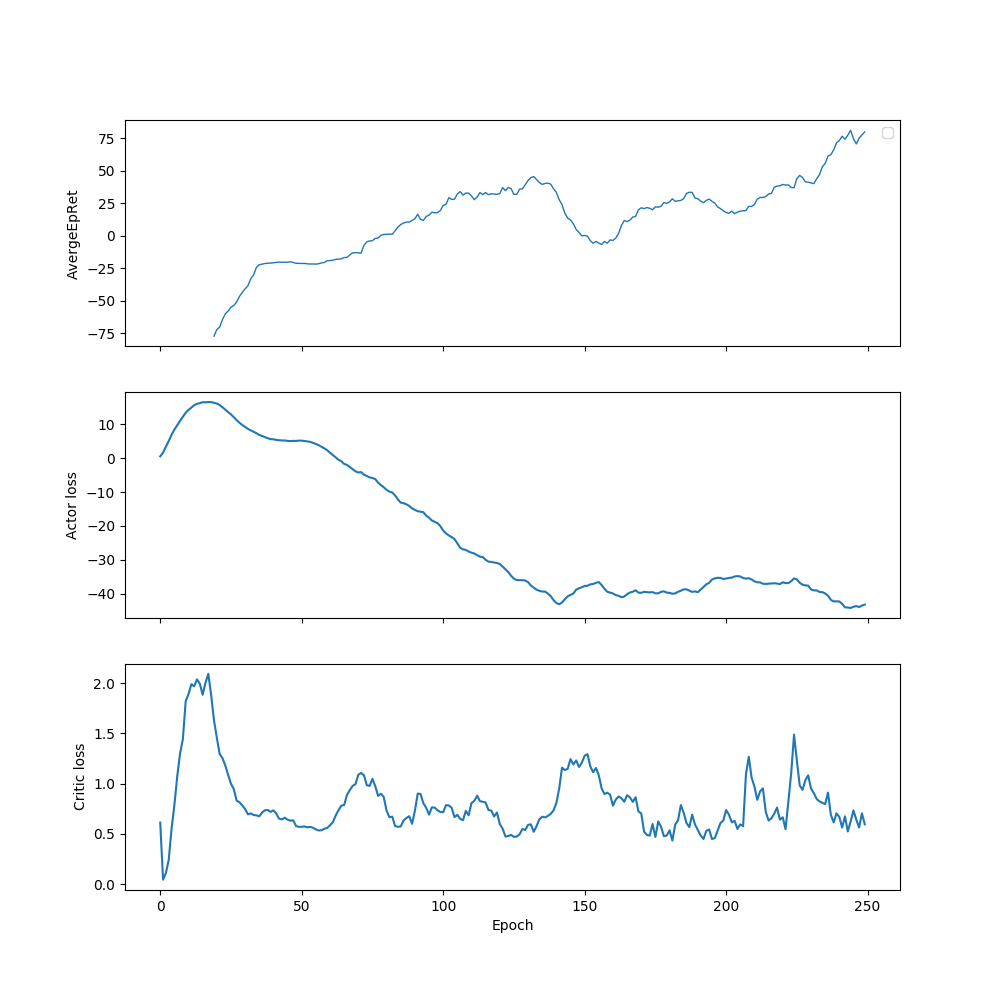

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


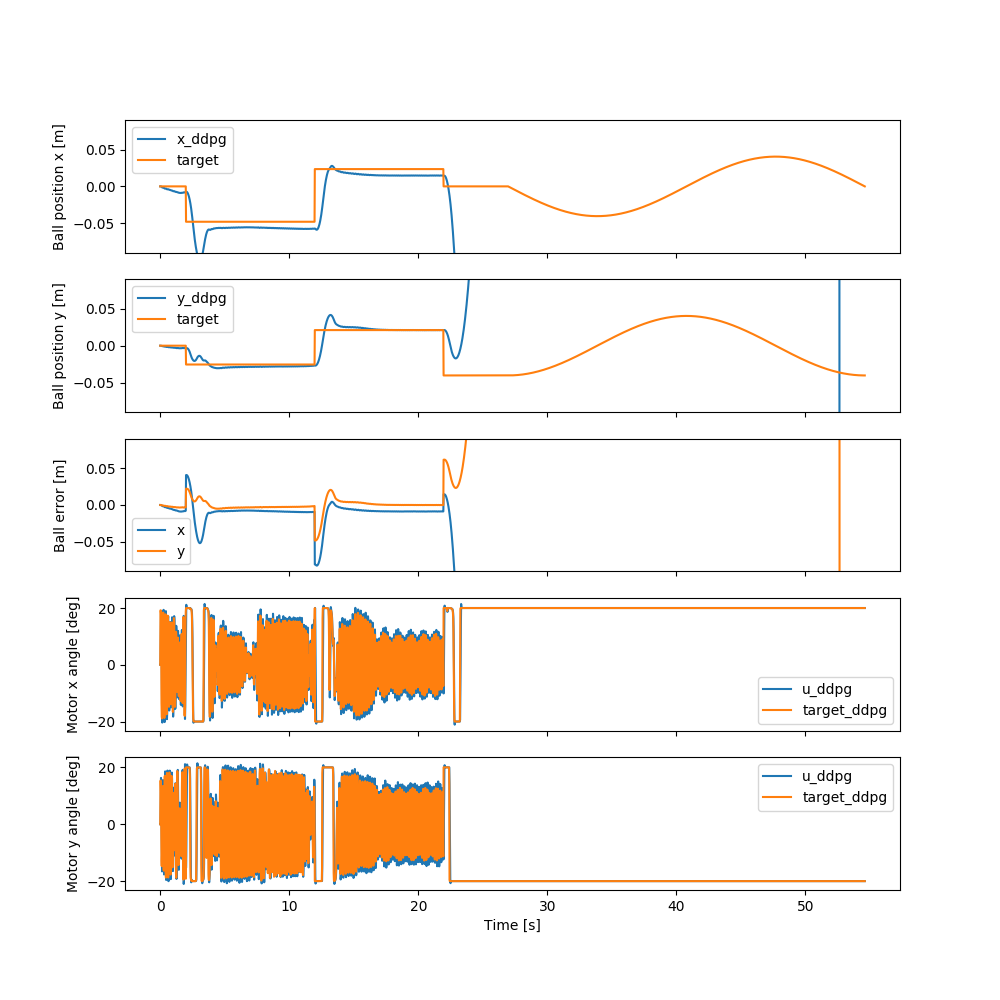

In [9]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 15000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [10]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward
w = 1
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='pe1_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.01932807,  0.01510985], dtype=float32), array([0.03724279, 0.06178985], dtype=float32), array([-0.0003167 ,  0.00176108], dtype=float32))
-0.00016911006279341618


<IPython.core.display.Javascript object>


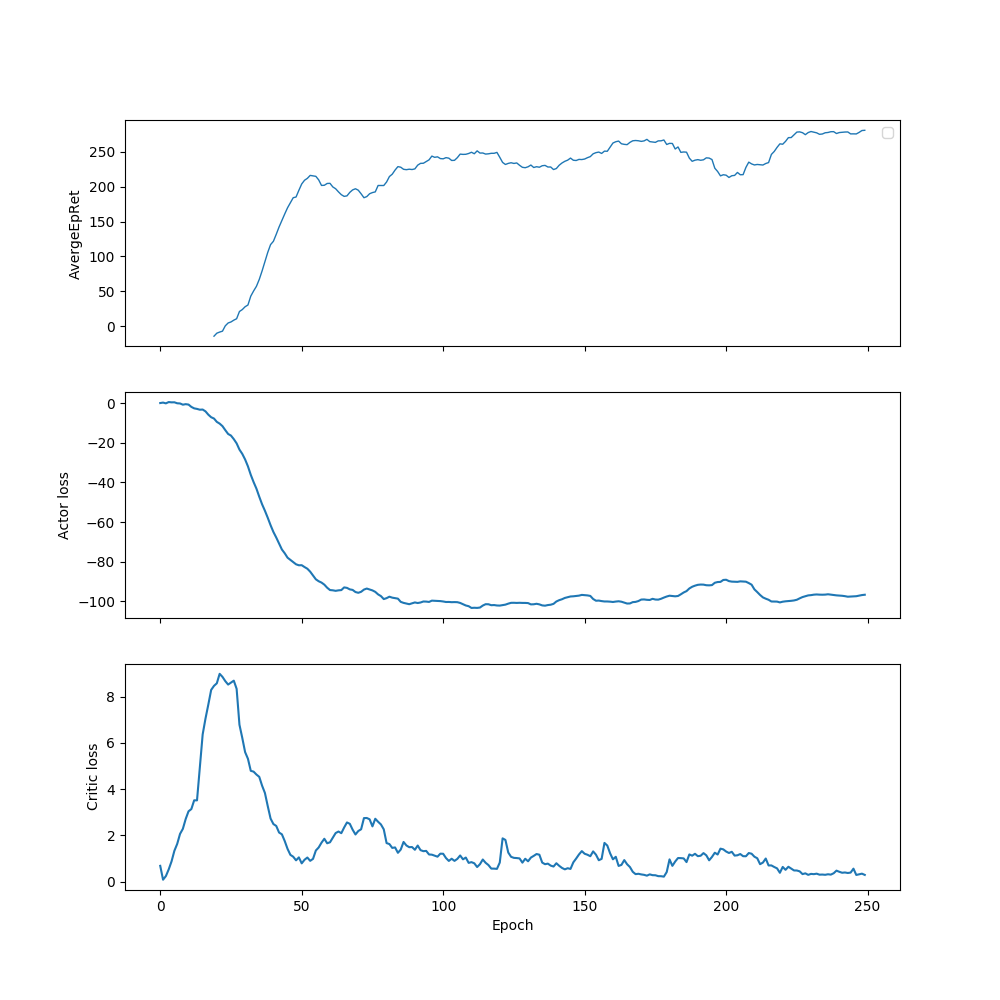

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


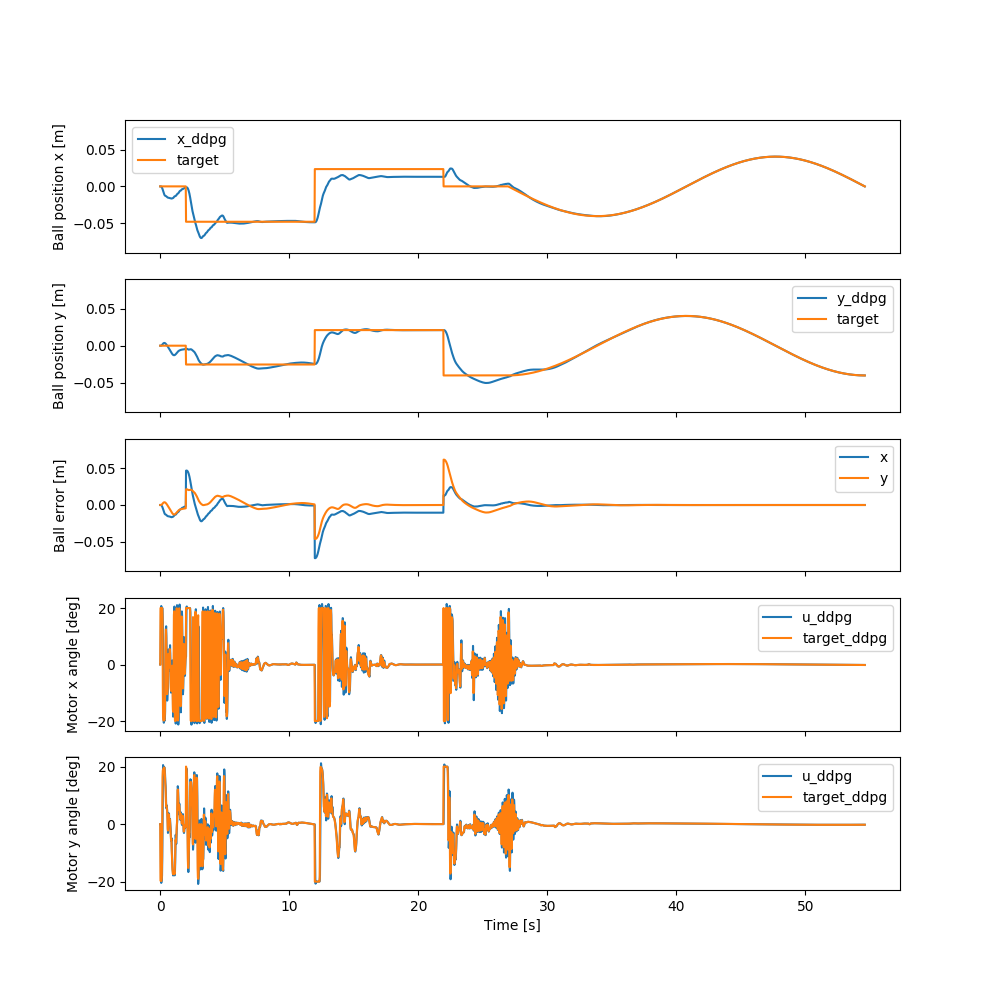

In [11]:
if False:#train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 15000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [12]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward_penality
w = 0.3
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='pep0.3_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.02227844, -0.05676242], dtype=float32), array([0.00729231, 0.03072019], dtype=float32), array([ 0.00136411, -0.00061414], dtype=float32))
-23804.35072526796


<IPython.core.display.Javascript object>


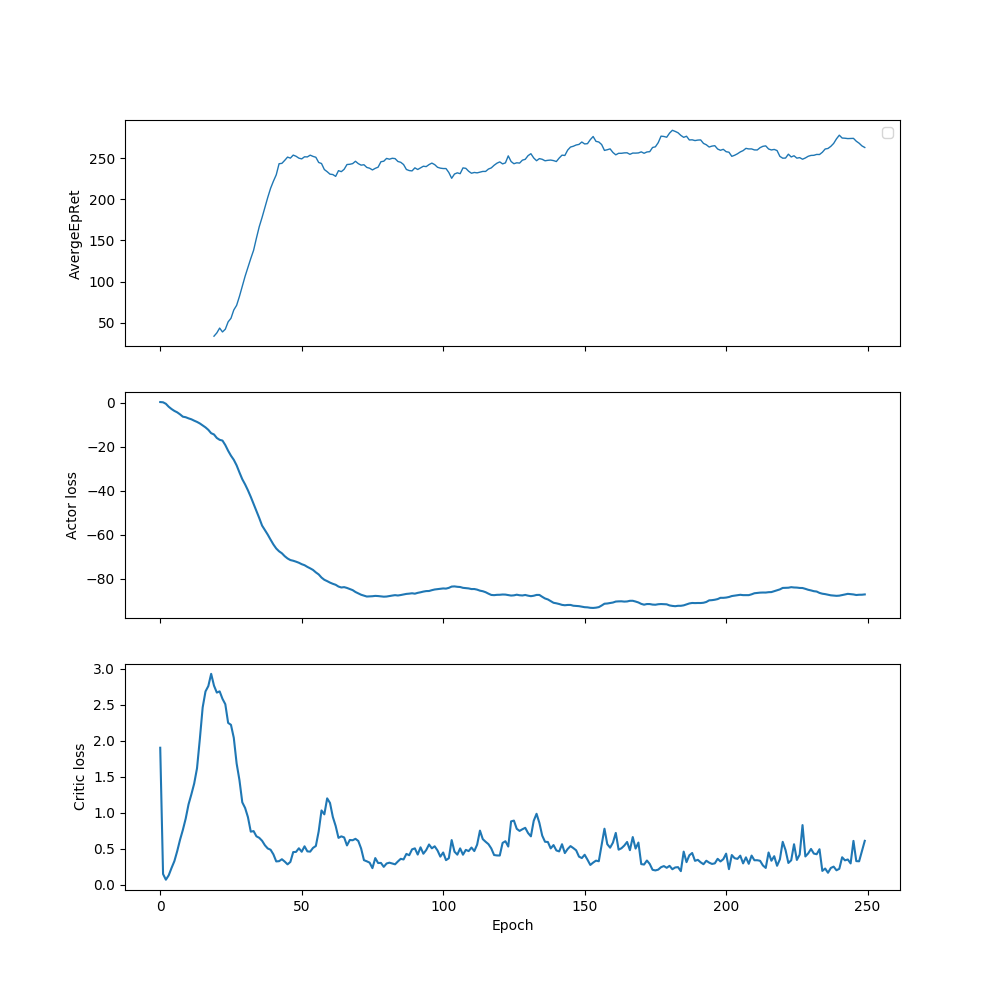

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


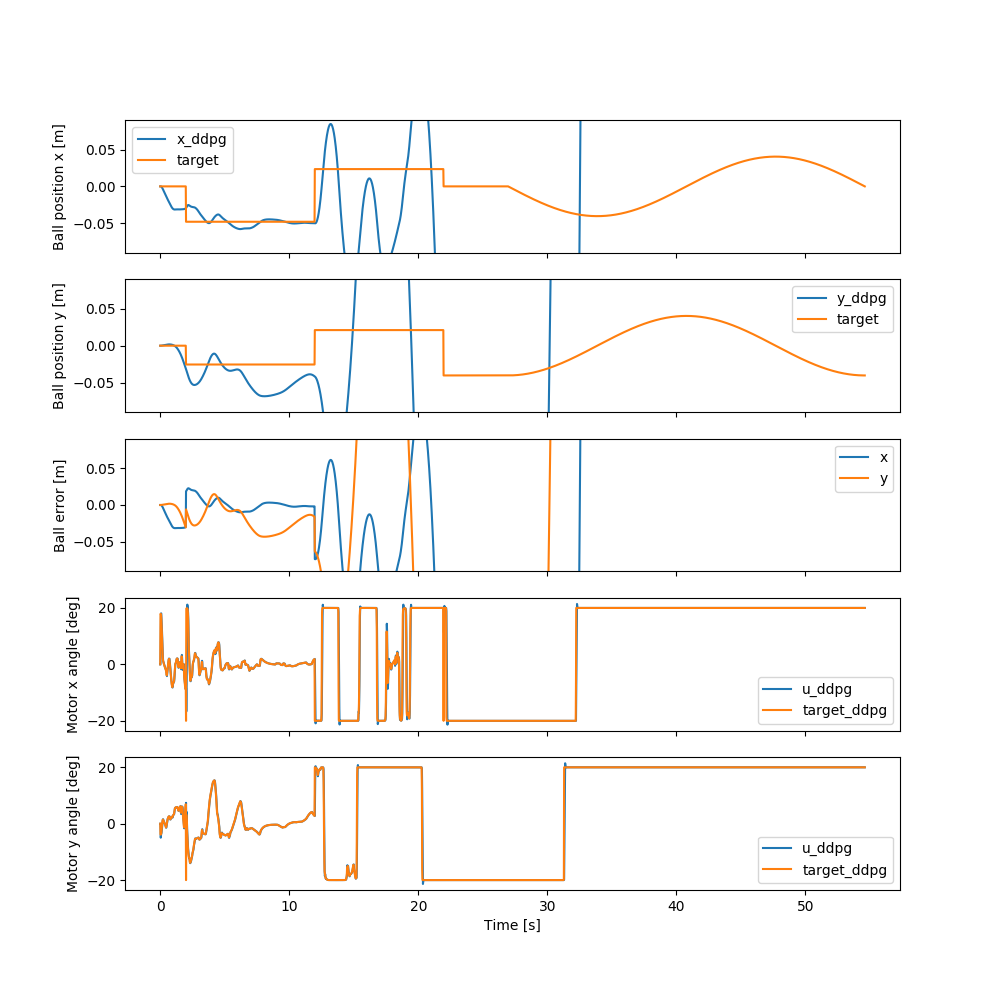

In [13]:
if False:#train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 15000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [14]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_de_reward
w = 15
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='de15_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.00969092, 0.05733495], dtype=float32), array([-0.04431041,  0.05770994], dtype=float32), array([ 0.00031762, -0.0028598 ], dtype=float32))
-0.00018947311549312554


<IPython.core.display.Javascript object>


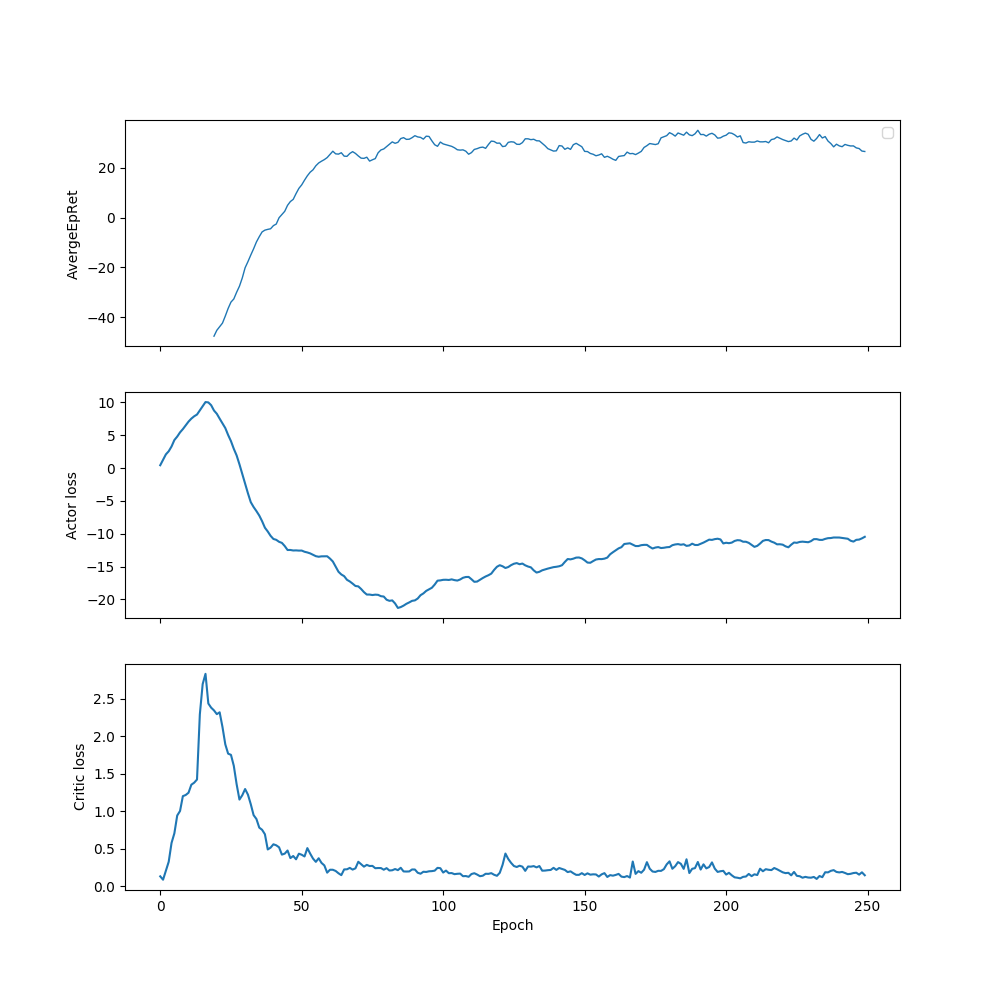

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


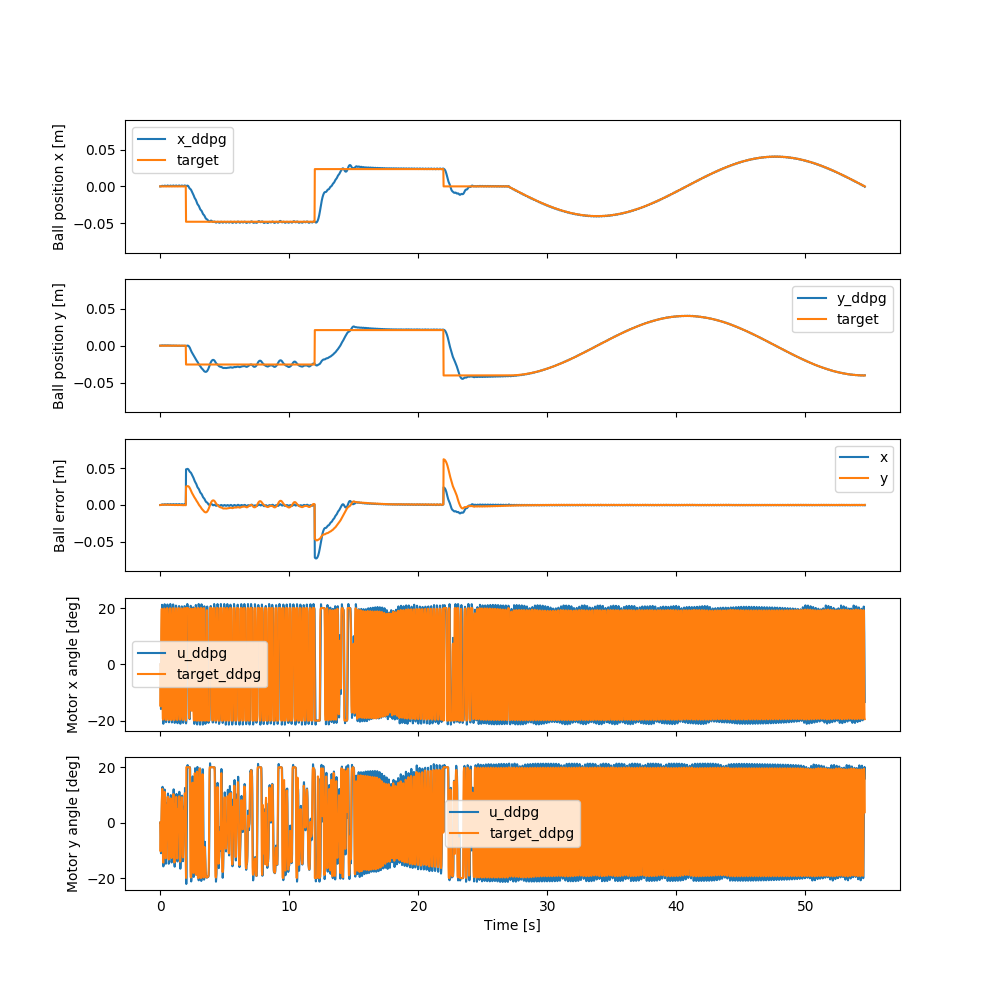

In [15]:
if False:#train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 15000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [16]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_e_reward
w = 0.3
hidden_size = [100]
gamma = 0.99
act = torch.nn.Sigmoid
name='le0.3_[100]_signmoid_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.03602978, 0.02653211], dtype=float32), array([-0.00465268,  0.05139699], dtype=float32), array([ 0.0021007 , -0.00020332], dtype=float32))
-0.0006902069353411453


<IPython.core.display.Javascript object>


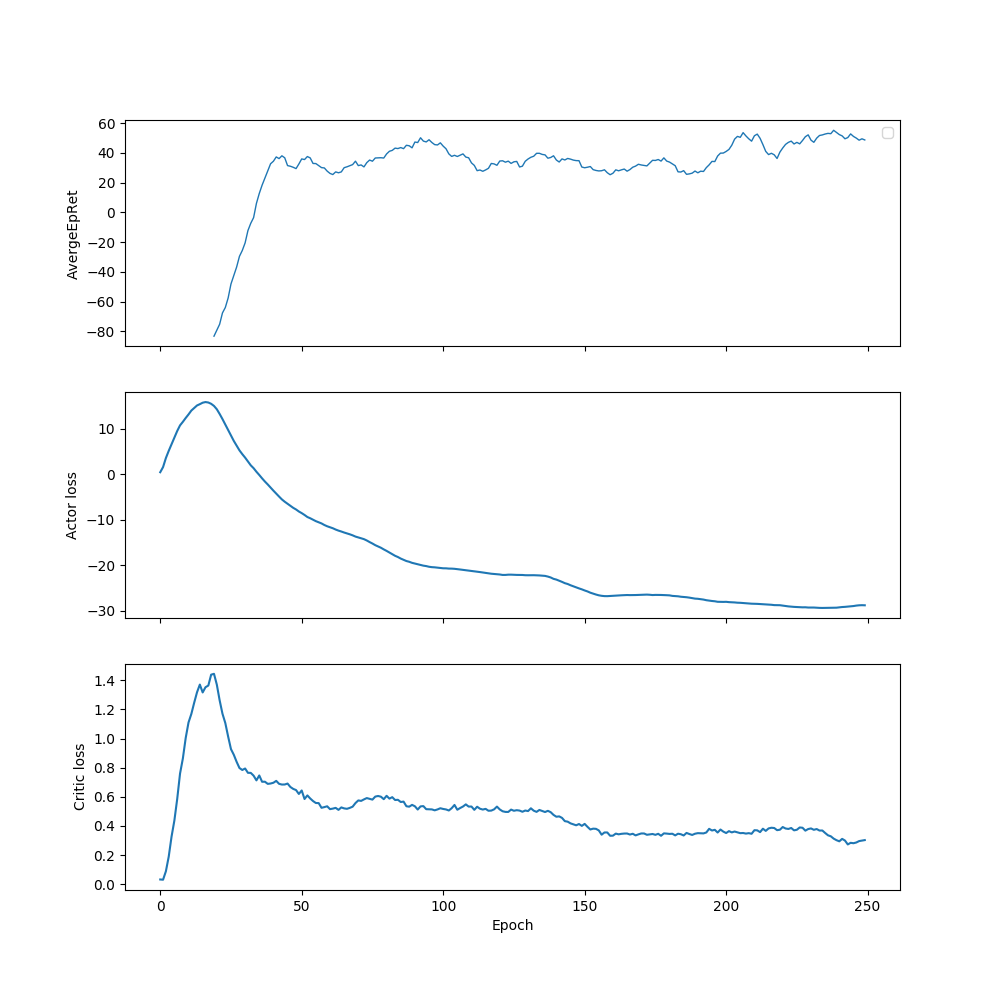

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


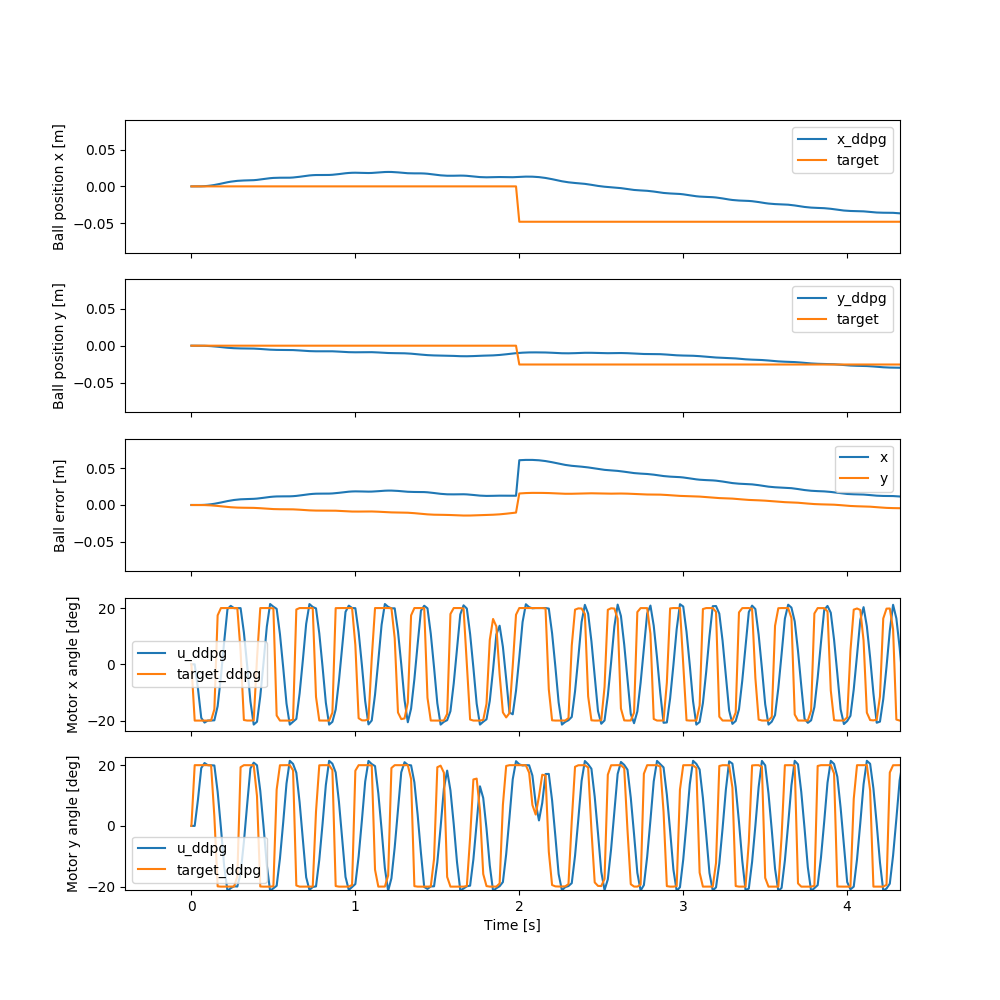

In [18]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 150000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [20]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward
w = 1
hidden_size = [100]
gamma = 0.99
act = torch.nn.Sigmoid
name='pe1_[100]_sigmoid_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'weights': [0.13217775821685793, 0.0007221597194671631, 0.0008730570785701275]}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.04331851, -0.01531257], dtype=float32), array([-0.02691744,  0.01388525], dtype=float32), array([0.00270881, 0.00043995], dtype=float32))
-0.0010097569832460593


<IPython.core.display.Javascript object>


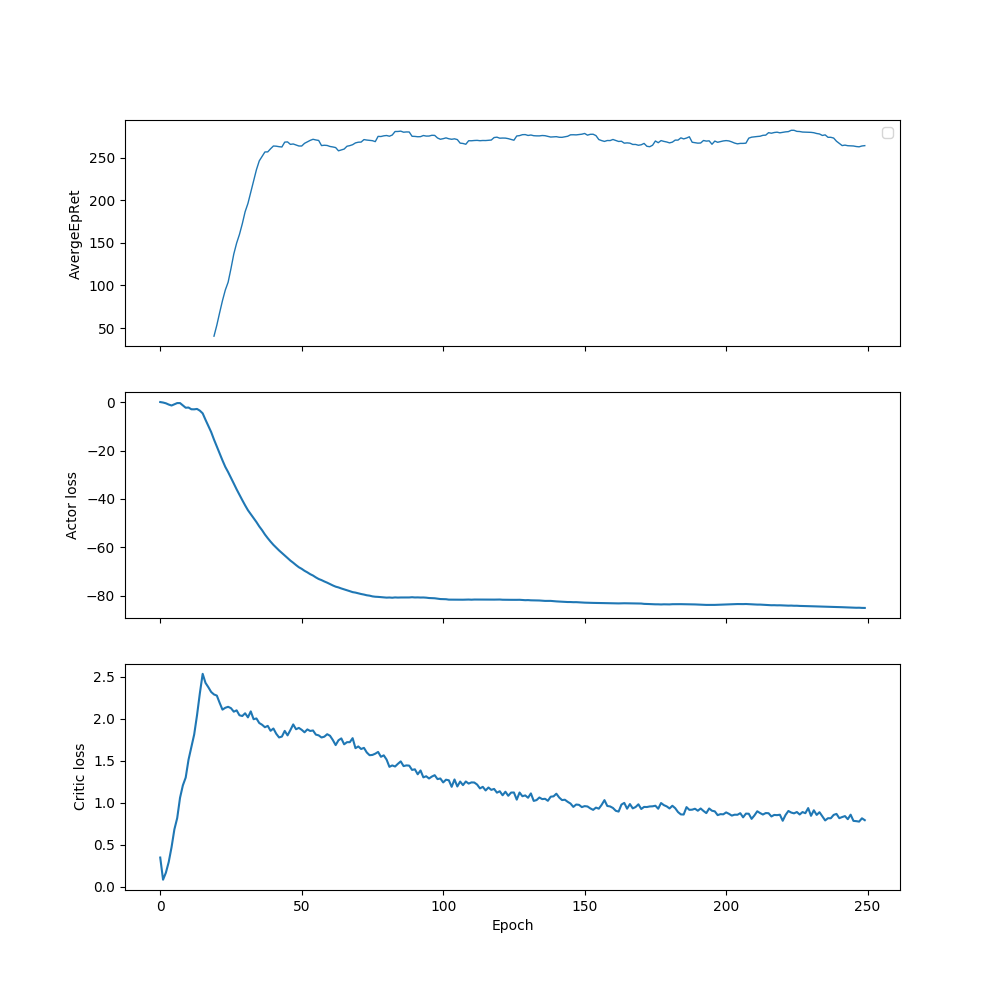

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


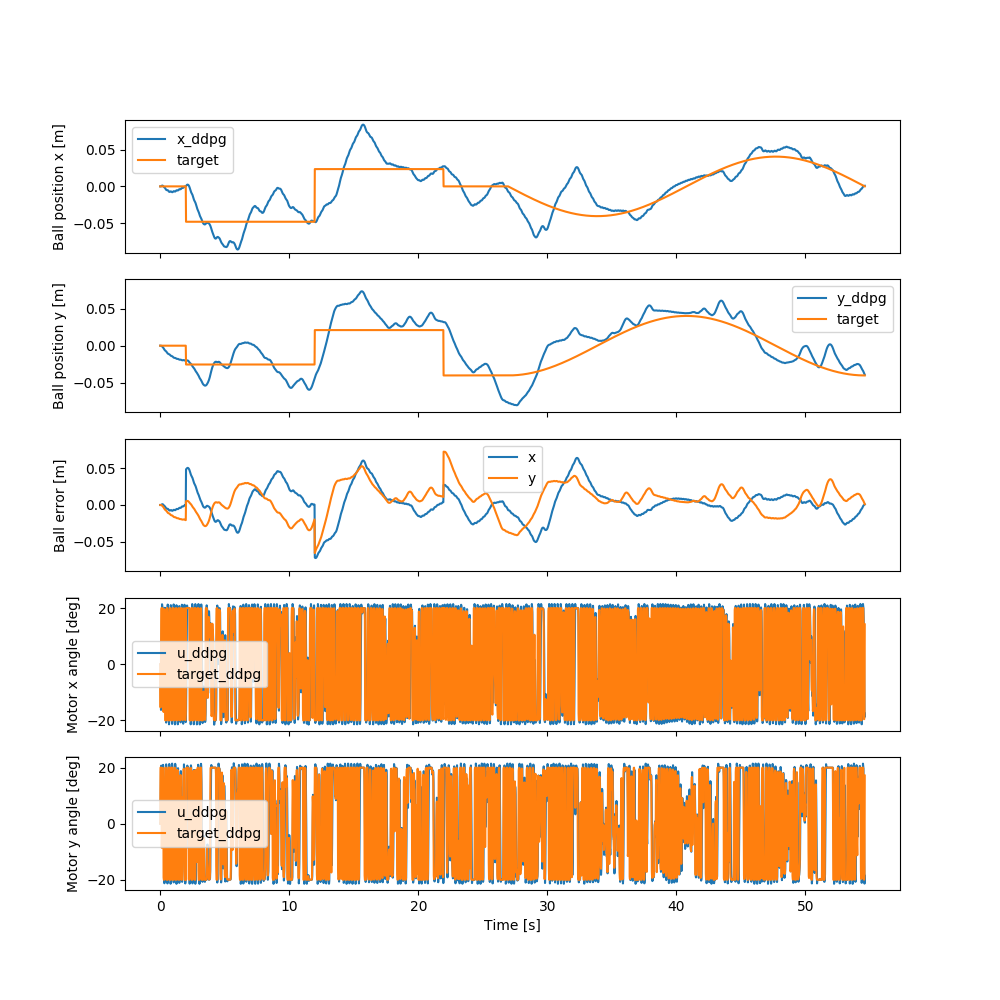

In [21]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [20]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward_penality
w = 0.3
hidden_size = [100]
gamma = 0.99
act = torch.nn.Sigmoid
name='pep0.3_[100]_sigmoid_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([ 0.00791005, -0.00087513], dtype=float32), array([-0.06096811, -0.03538873], dtype=float32), array([0.00138614, 0.00088814], dtype=float32))
-0.0007985239095186683


<IPython.core.display.Javascript object>


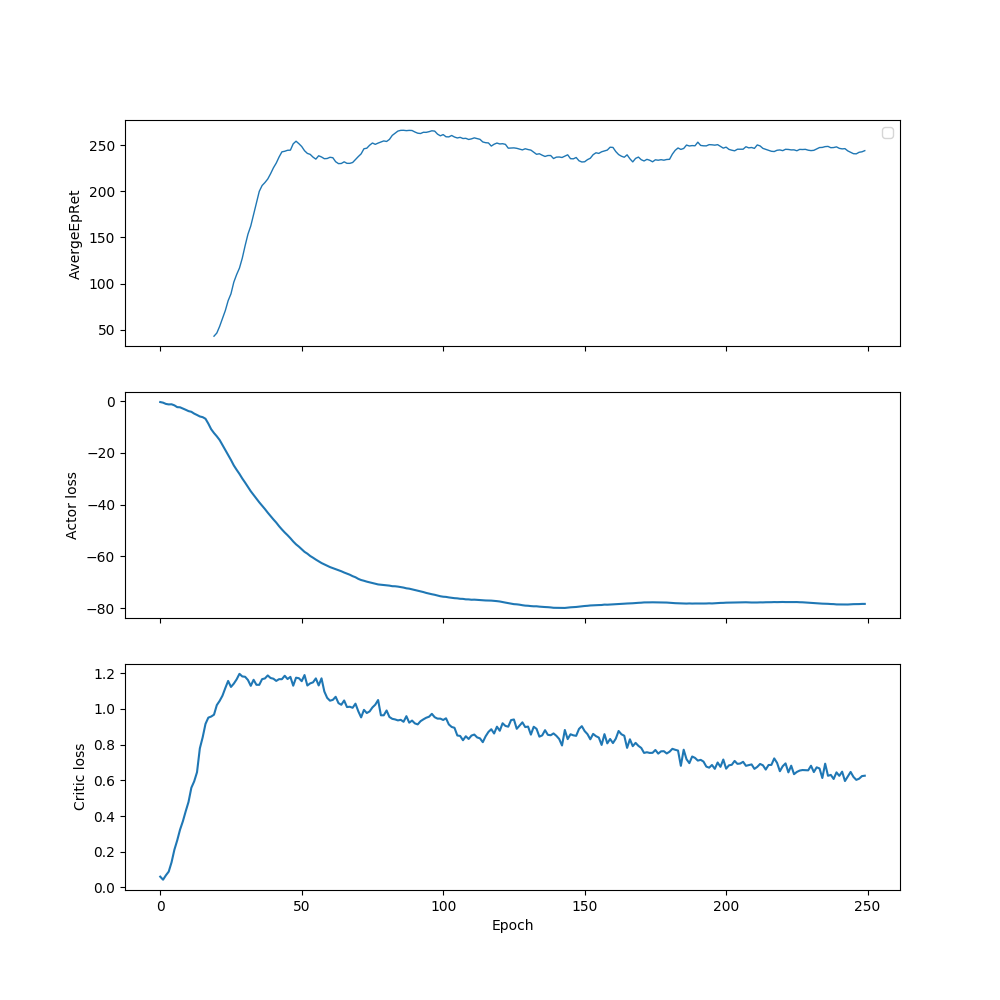

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


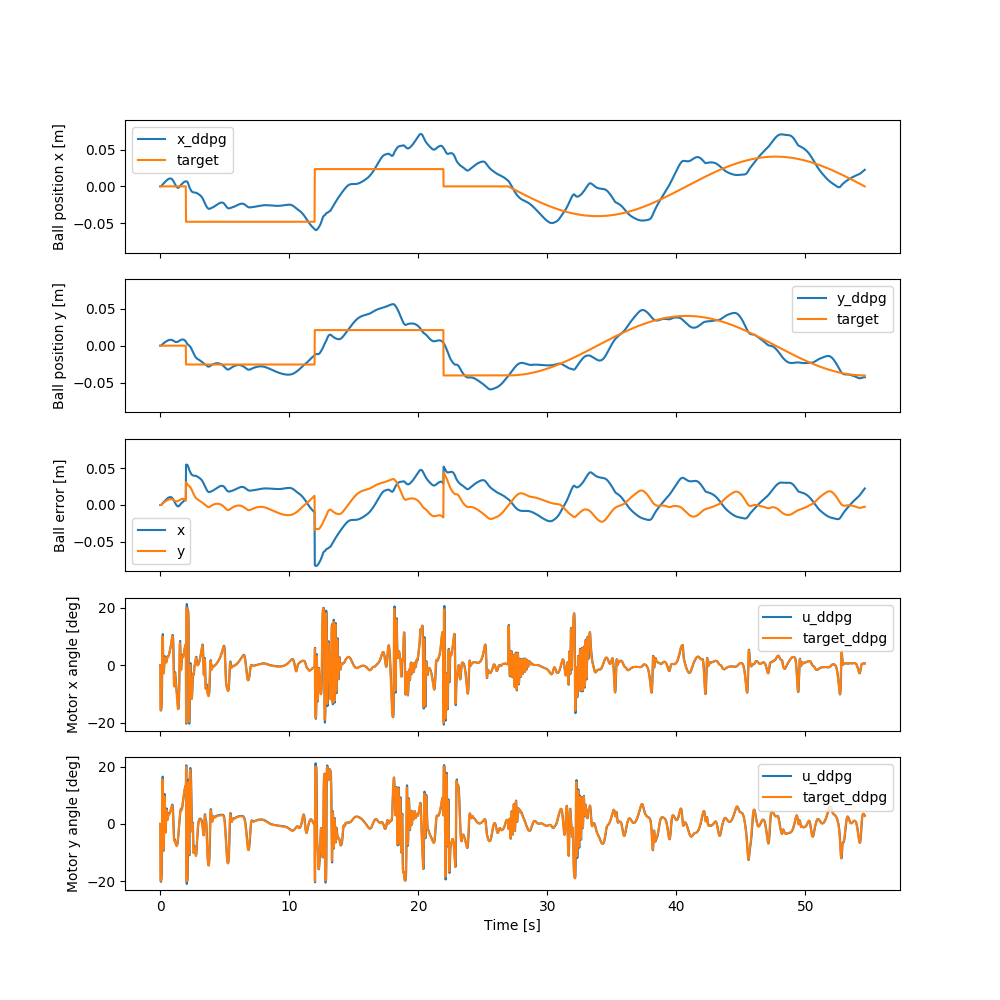

In [21]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [22]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_de_reward
w = 15
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='de15_[100]_sigmoid_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.07106724, 0.03167953], dtype=float32), array([-0.02692133,  0.00373475], dtype=float32), array([ 0.00252676, -0.00211058], dtype=float32))
-0.0001462247214260638


<IPython.core.display.Javascript object>


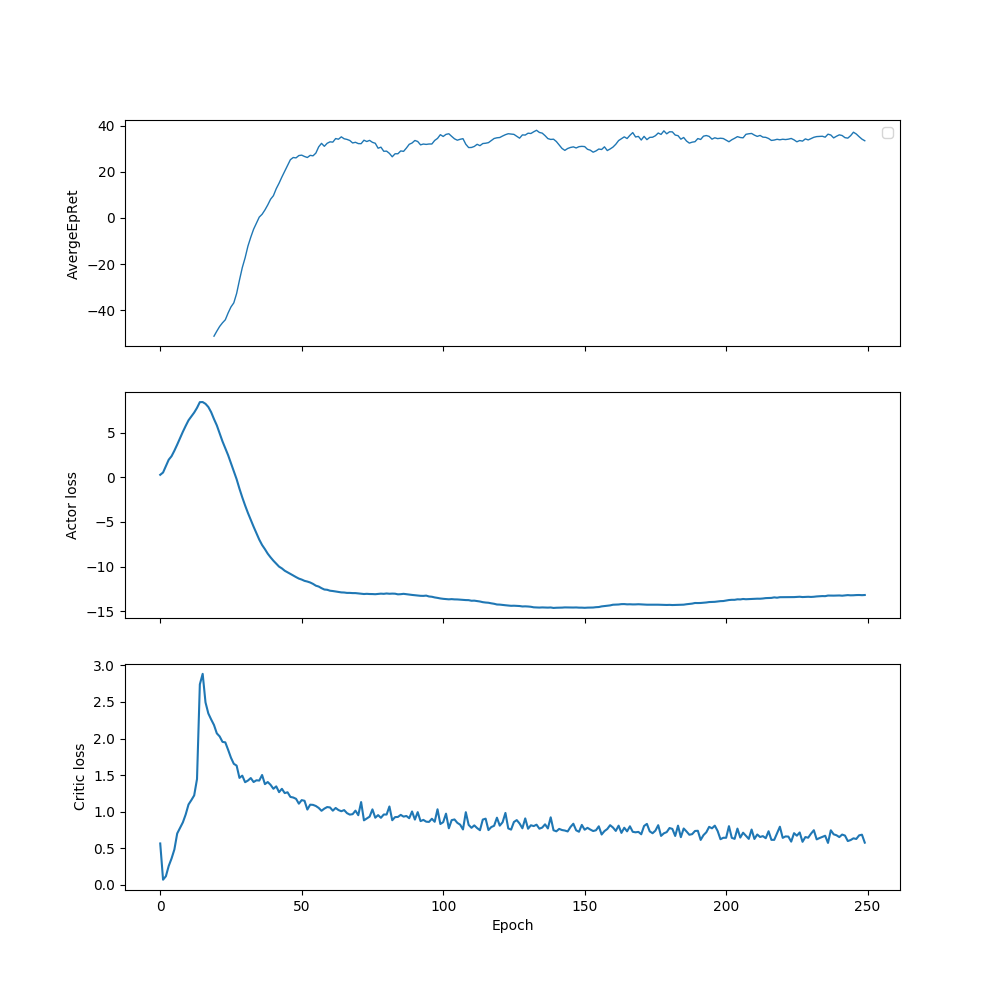

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


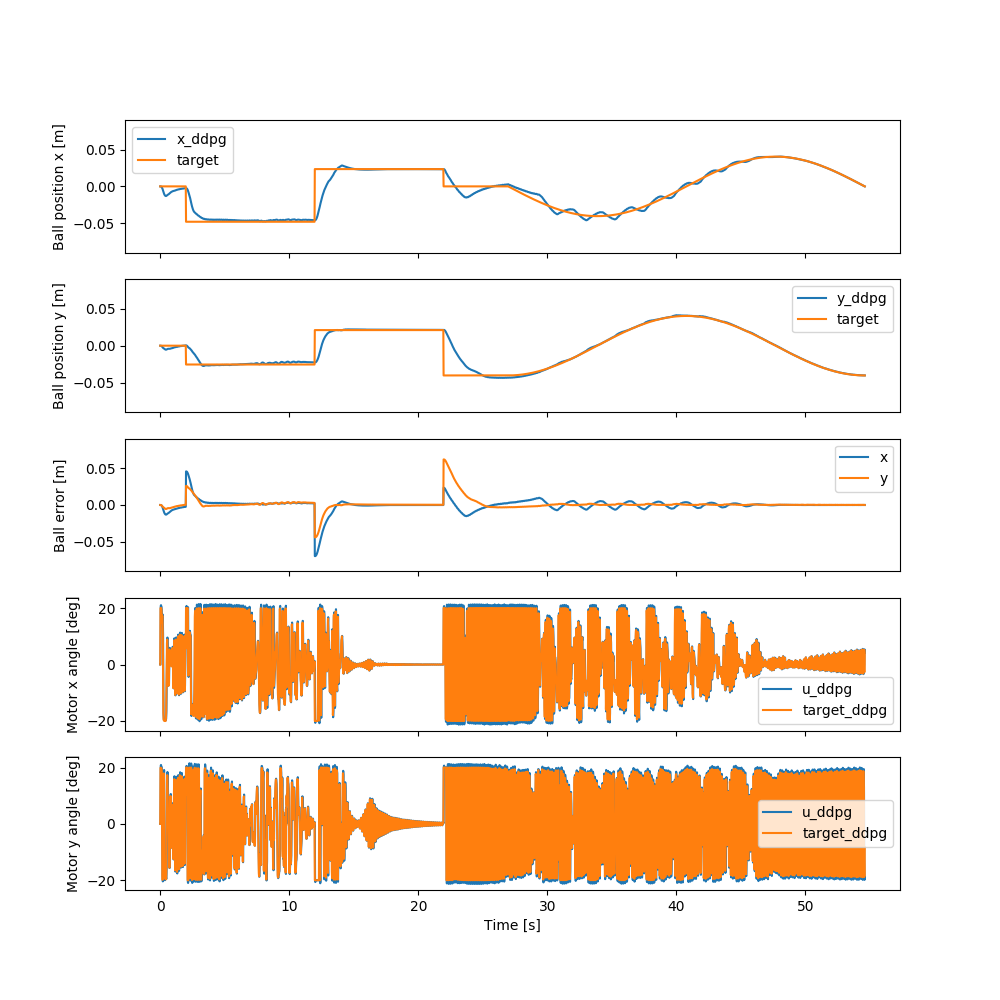

In [23]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [24]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_e_reward
w = 0.6
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='le0.6_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.03039021,  0.04379907], dtype=float32), array([-0.06473632, -0.03829878], dtype=float32), array([-0.00272043,  0.00109485], dtype=float32))
-0.0001550869582021654


<IPython.core.display.Javascript object>


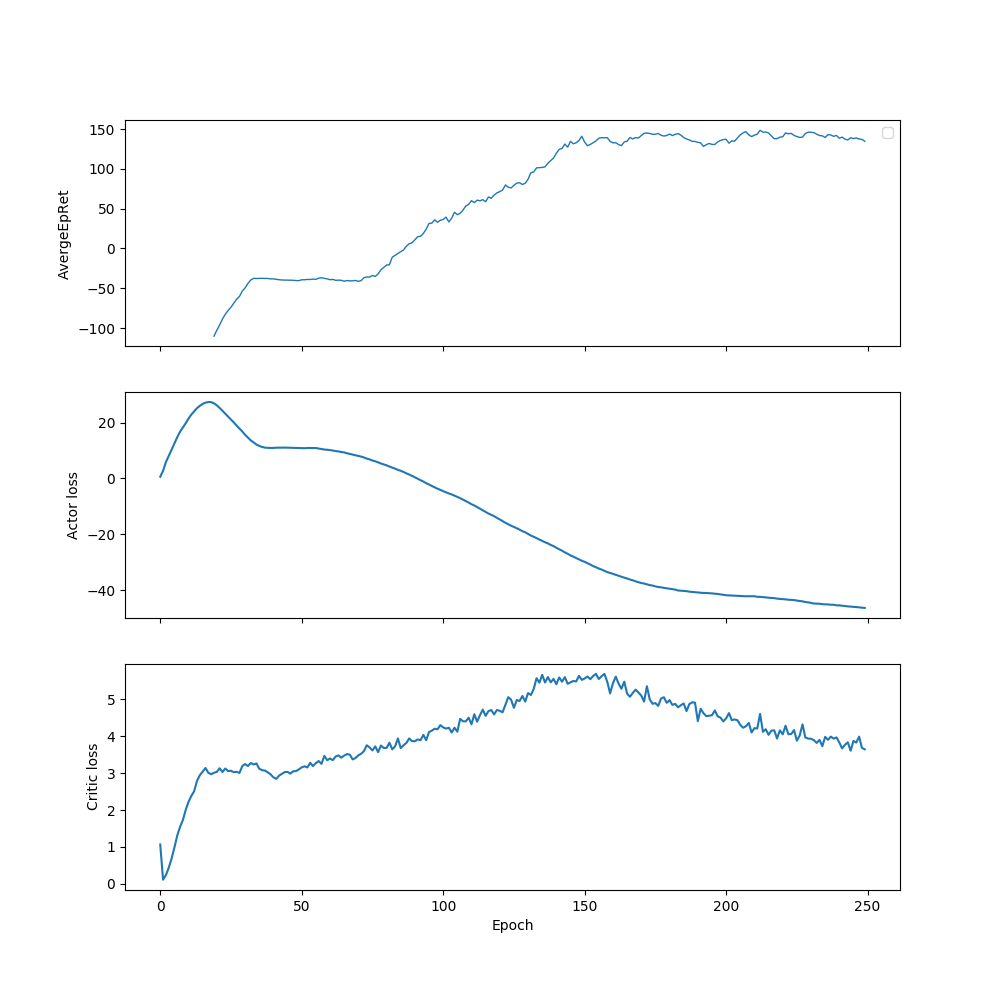

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


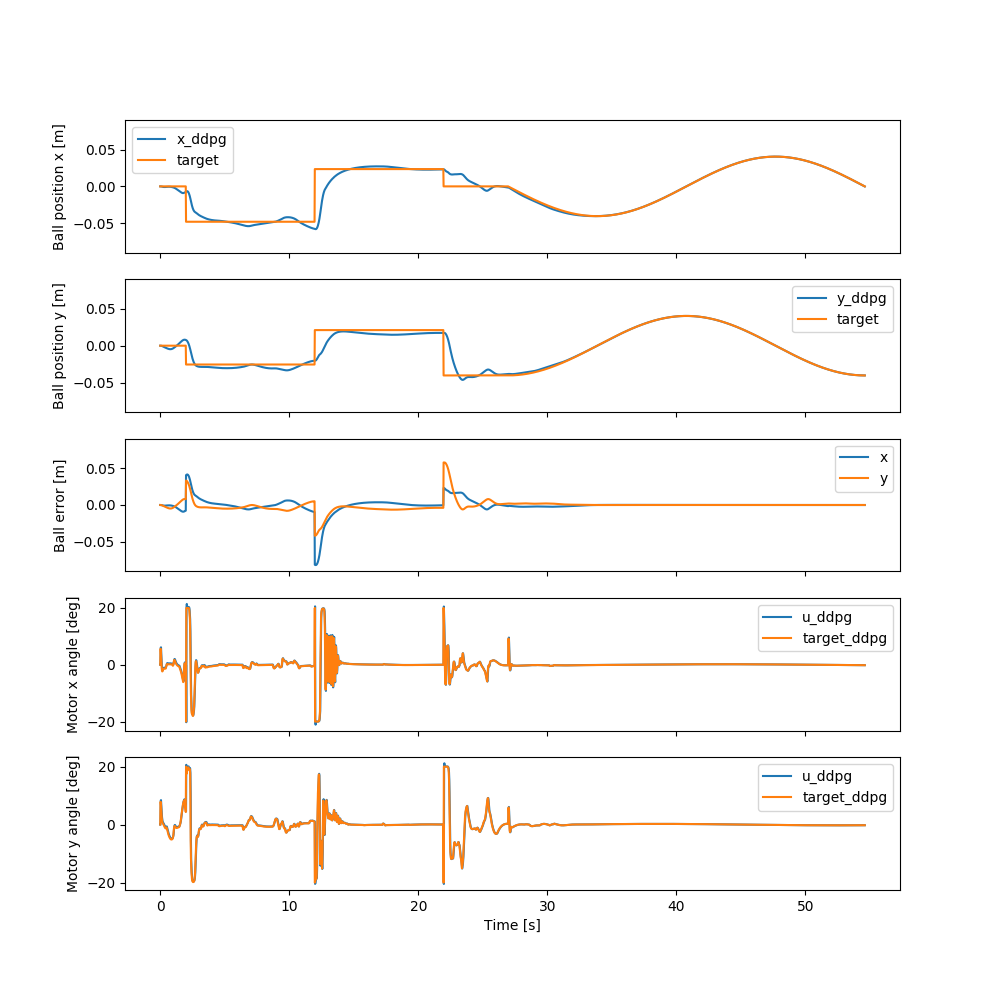

In [25]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [26]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward
w = 1.4
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='pe1.4_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([ 0.06034743, -0.05165723], dtype=float32), array([ 0.06270899, -0.01787134], dtype=float32), array([-0.00277638,  0.00141347], dtype=float32))
-0.0002303432219834078


<IPython.core.display.Javascript object>


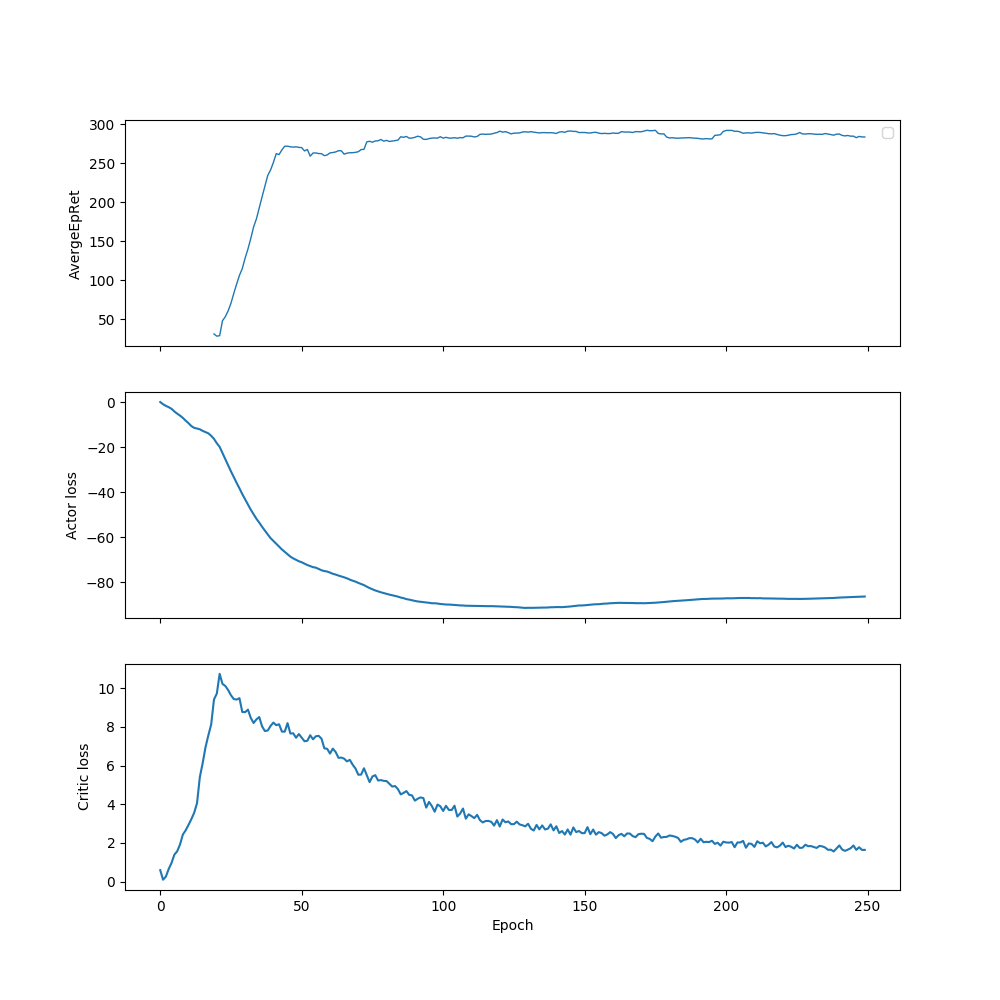

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


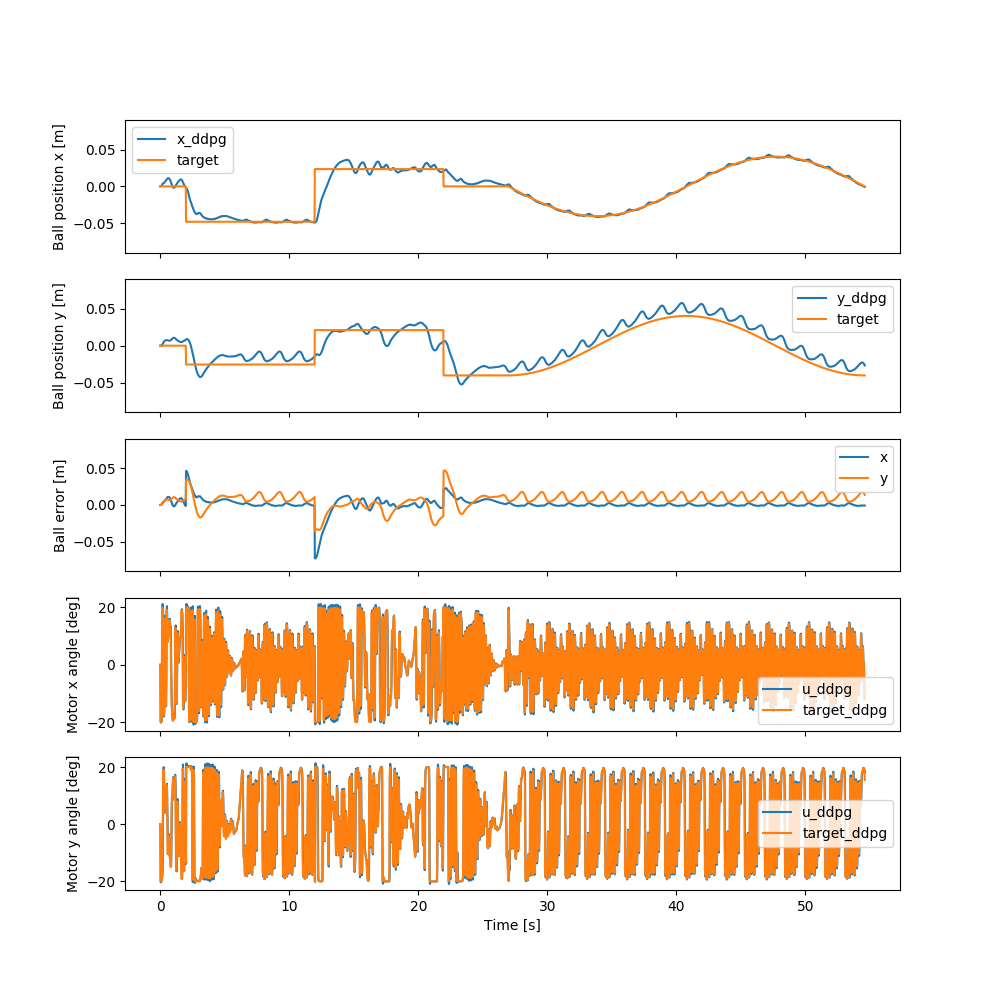

In [27]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [28]:
env = BBEnv
ac = MLPActorCritic
reward_fn = quadratic_e_reward_penality
w = 0.6
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='pep0.6_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([-0.0274439 , -0.04278435], dtype=float32), array([-0.02943091, -0.03580199], dtype=float32), array([ 0.00189008, -0.00208641], dtype=float32))
-0.0030130292850828098


/home/benoit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


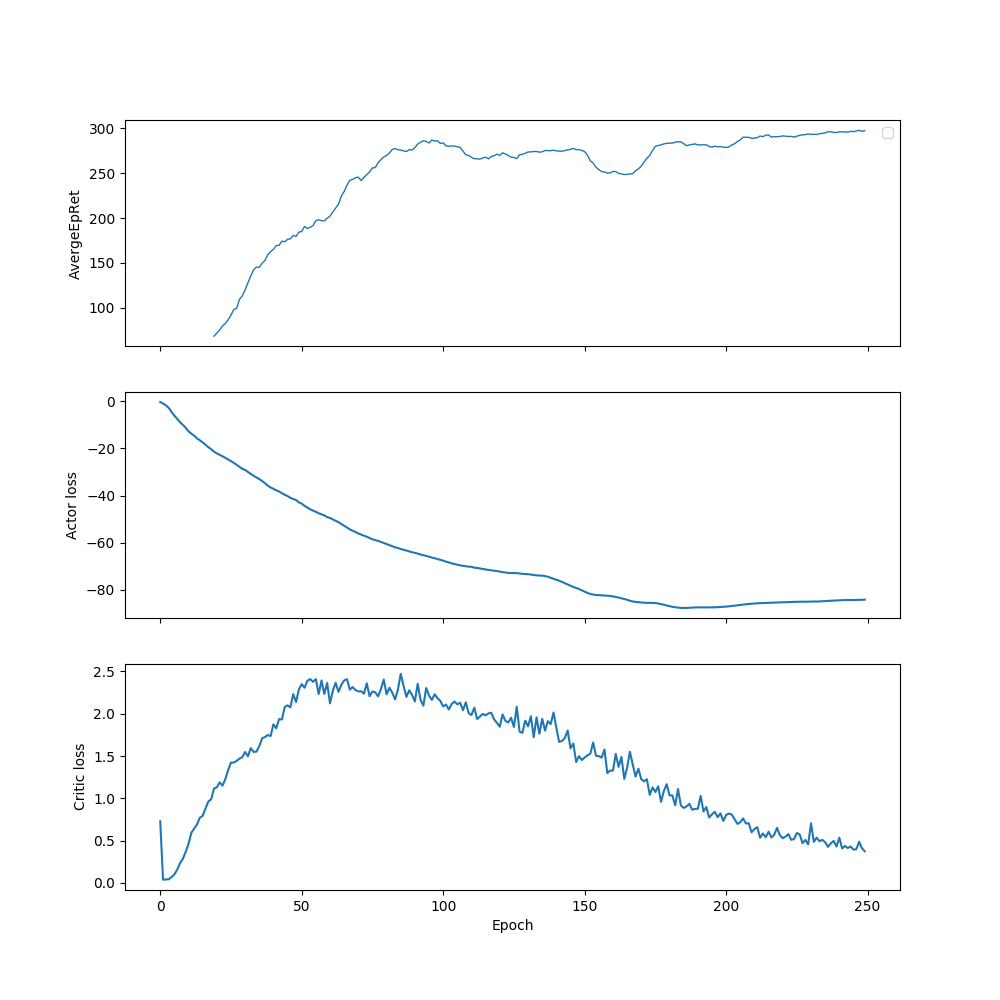

No handles with labels found to put in legend.
/home/benoit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


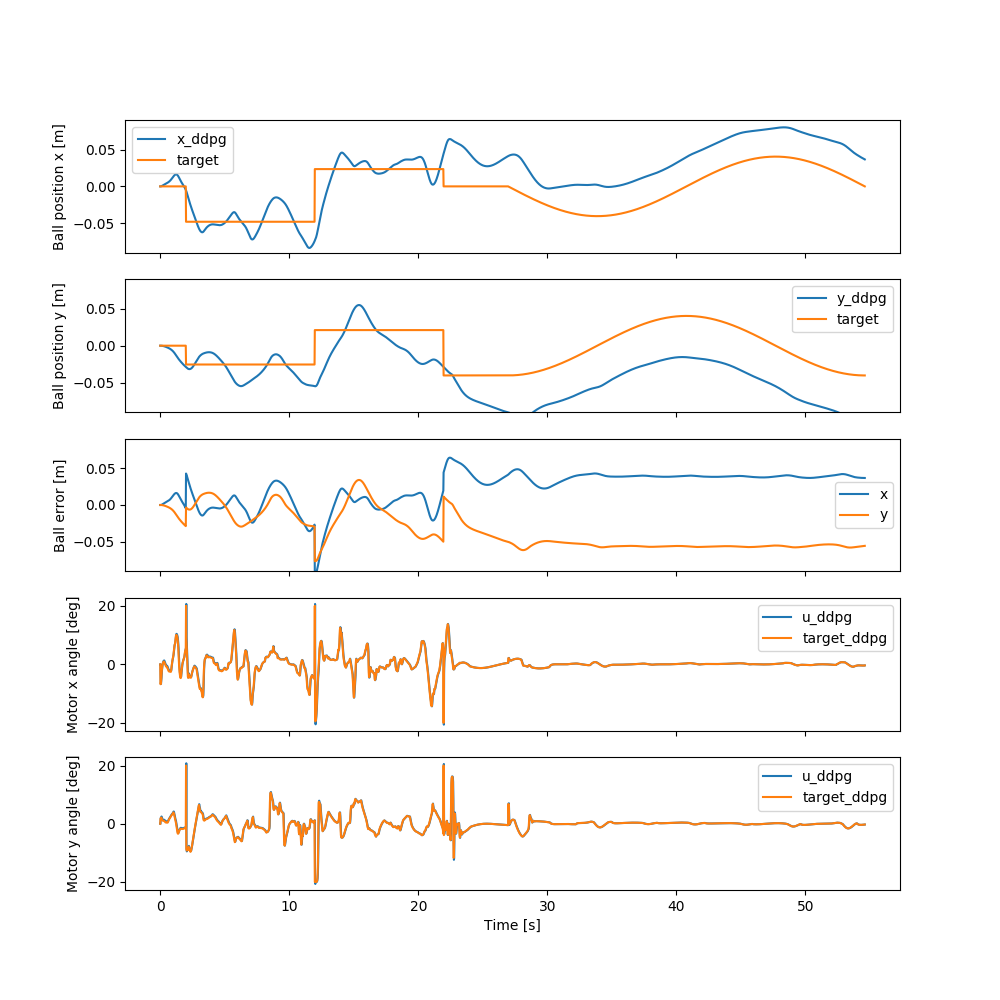

In [29]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()

In [30]:
env = BBEnv
ac = MLPActorCritic
reward_fn = linear_de_reward
w = 5
hidden_size = [100]
gamma = 0.99
act = torch.nn.ReLU
name='de5_[100]_relu_0.99'

{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'phy_coef': 217.59587893981333, 'phy_i_coef_u': 217.17632054282475, 'phy_i_coef_s': 7274.250340039798, 'speed_scaling': 20000}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'weights': [0.15728610754013062, 0.001560160541534424, 0.02386050671339035], 'bias': 0.05579447001218796}
{'phy_i_coef': [[0.004883899372829428, -0.0002783757757233037, -0.0028964127848784505, 0.0003109734119487393], [0.00014171512975994787, 0.002639176413894046, 6.8411362451718805e-06, -0.0016660219749745045]], 's_scaling': 1.0, 'sin_scaling': 7.0}
(array([0.01113507, 0.04798177], dtype=float32), array([-0.0213584,  0.035446 ], dtype=float32), array([0.00097545, 0.00241974], dtype=float32))
-0.0013157208634683585


/home/benoit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


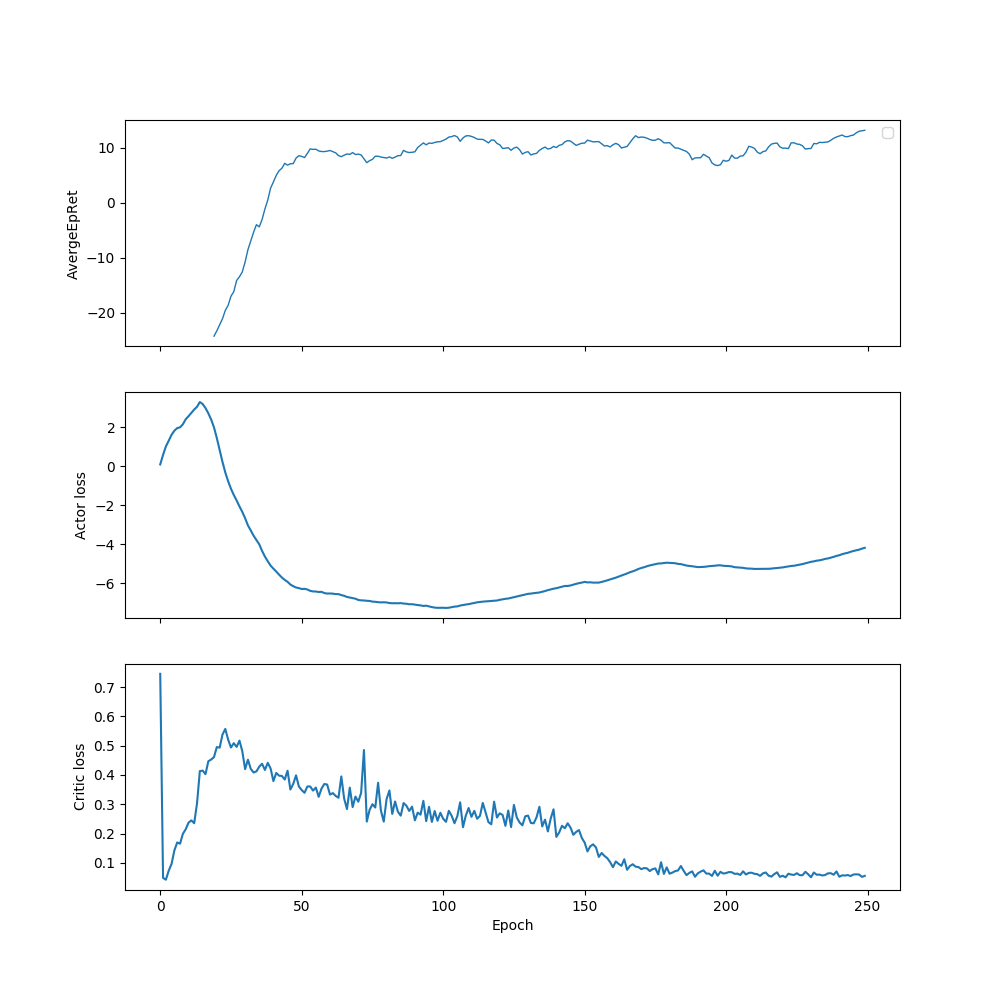

No handles with labels found to put in legend.
/home/benoit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


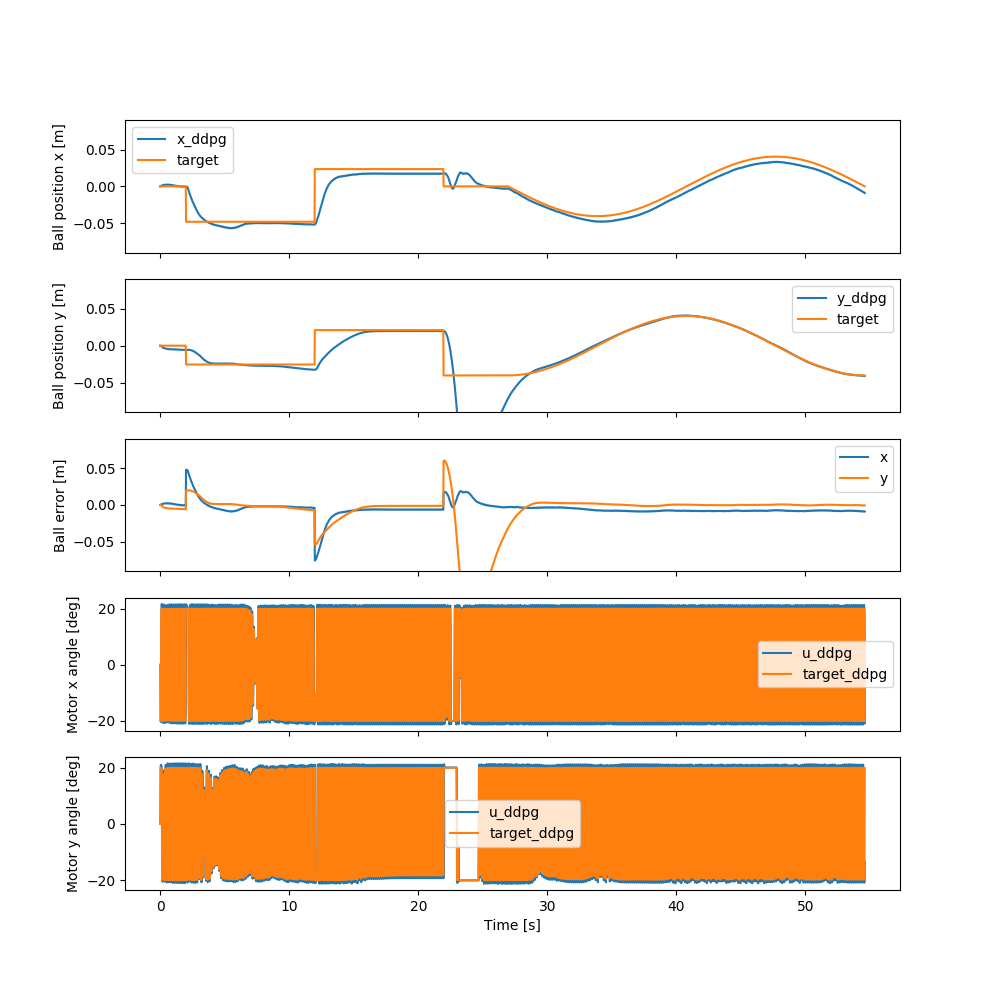

In [31]:
if train:
    spinup.ddpg_pytorch(env_fn_gen(env, reward_fn, w),
                                actor_critic = ac,    
                                ac_kwargs = dict(hidden_sizes=hidden_size, activation=act), 
                                seed = 0, 
                                steps_per_epoch = 1100, 
                                epochs = epoch, 
                                replay_size = 300000, 
                                gamma = 0.99, 
                                polyak = 0.995, 
                                pi_lr = 0.001,
                                q_lr = 0.001,
                                batch_size = 500, 
                                start_steps = 15000,
                                act_noise = 0.1,
                                max_ep_len = 400,
                                update_every= 100,
                                num_test_episodes=20,
                                logger_kwargs = dict(output_dir='{}/{}'.format(root, name), exp_name='test'),
                                )
trained_ac = torch.load('{}/{}/pyt_save/model.pt'.format(root, name))
evaluator_ddpg = env()
history_ddpg, error_ddpg, u_ddpg, angle_ddpg, loss_ddpg = evaluator_ddpg.simulate(trained_ac, test_trajectory)

print(loss_ddpg)

log = pd.read_csv('{}/{}/progress.txt'.format(root, name), sep='\t')
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 10))
axs[0].plot(log['AverageEpRet'].rolling(window=20).mean(), linewidth=1)
axs[0].set_ylabel('AvergeEpRet')
axs[0].legend()
axs[2].set_xlabel('Epoch')

axs[1].plot(log['LossPi'])
axs[1].set_ylabel('Actor loss')
axs[2].set_xlabel('Epoch')

axs[2].plot(log['LossQ'])
axs[2].set_ylabel('Critic loss')
axs[2].set_xlabel('Epoch')

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(10, 10))

axs[0].plot(t, history_ddpg[0, :], label='x_ddpg')
axs[0].plot(t, test_trajectory[0, :], label='target')
axs[0].set_ylabel('Ball position x [m]')
axs[0].set_ylim([-MAX_X, MAX_X])
axs[0].legend()

axs[1].plot(t, history_ddpg[1,:], label='y_ddpg')
axs[1].plot(t, test_trajectory[1, :], label='target')
axs[1].set_ylabel('Ball position y [m]')
axs[1].set_ylim([-MAX_X, MAX_X])
axs[1].legend()

axs[2].plot(t, error_ddpg[0, :], label='x')
axs[2].plot(t, error_ddpg[1, :], label='y')
axs[2].set_ylabel('Ball error [m]')
axs[2].set_ylim([-MAX_X, MAX_X])
axs[2].legend()

axs[3].plot(t, angle_ddpg[0, :], label='u_ddpg')
axs[3].plot(t, u_ddpg[0, :], label='target_ddpg')
axs[3].set_ylabel('Motor x angle [deg]')
axs[3].legend()

axs[4].plot(t, angle_ddpg[1, :], label='u_ddpg')
axs[4].plot(t, u_ddpg[1, :], label='target_ddpg')
axs[4].set_xlabel('Time [s]')
axs[4].set_ylabel('Motor y angle [deg]')
axs[4].legend()

plt.show()